In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
trans = [
    'airplane',										
    'automobile',										
    'bird',										
    'cat',										
    'deer',										
    'dog	',									
    'frog',										
    'horse',										
    'ship',										
    'truck'
]

airplane


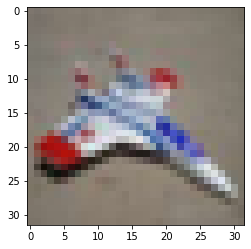

In [5]:
import matplotlib.pyplot as plt
idx = 30
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten
layer = [
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Flatten(),
    # Dense(128, activation='relu'),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
]

model = Sequential(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)        0

In [ ]:
# model.get_layer('conv2d_11').get_weights()[0].shape

In [8]:
# y: one-hot(浪費ram) -> 告訴他非0位置就好(Sparse)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [11]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
# batch_size: 我看多少筆, 把所有筆的斜率做一個平均, 再調整
# 圖片小(不吃那麼多ram):100-200 圖片大(吃很多ram):10-20
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=5,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

In [ ]:
model.evaluate(x_test_norm, y_test)

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_pre = pre[idx]
false_img = x_test[idx]
false_true = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(trans[false_pre[i]], 
                   trans[false_true[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
import requests
from PIL import Image
url = "https://cw1.tw/CW/images/article/201708/article-598d1b33a34a9.jpg" #@param {type:"string"}
response = requests.get(url, stream=True, verify=False)    # Disable SSL verify驗證
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
# (32, 32, 3)X -> (1, 32, 32, 3)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
pre = model.predict(img_np)[0]
for t, p in zip(trans, pre):
    print(t, "的機率:", round(p, 4))
print("最高機率:", trans[pre.argmax()])
plt.imshow(img)

In [ ]:
# first layer
layers = [
    model.layers[0]
]
partial = Sequential(layers)
conv = partial.predict(img_np)[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")

In [ ]:
# 128那層
layers = [
    model.layers[0],
    model.layers[2]
]
partial = Sequential(layers)
conv = partial.predict(img_np)[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")